[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/Automatic_Relevance_Determination.ipynb)

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.linear_model import ARDRegression, LinearRegression

In [14]:
np.random.seed(123)
n_samples=100
n_features=100
X=np.random.randn(n_samples,n_features)
lambda_=4.
w=np.ones(n_features)
relevant_features=np.random.randint(0,n_features,20)
for i in relevant_features:
  w[i]=stats.norm.rvs(loc=0,scale=1./np.sqrt(lambda_))
  alpha_=50.
noise=stats.norm.rvs(loc=0,scale=1./np.sqrt(alpha_),size=n_samples)
y=np.dot(X,w)+noise

clf=ARDRegression(compute_score=True)
clf.fit(X,y)
ols=LinearRegression()
ols.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

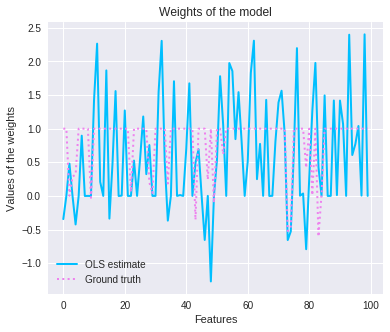

In [40]:
plt.figure(figsize=(6,5))
plt.title("Weights of the model")
plt.plot(clf.coef_,color='deepskyblue',linestyle='-',linewidth=2,label="OLS estimate")
plt.plot(w,color='violet',linestyle='dotted',linewidth=2,label="Ground truth")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc=3)

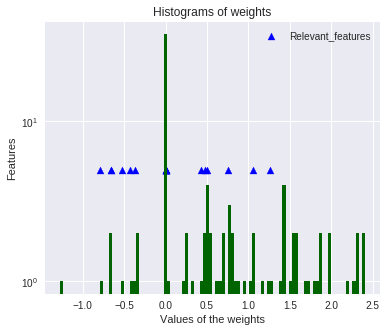

In [39]:
plt.figure(figsize=(6,5))
plt.title("Histograms of weights")
plt.hist(clf.coef_,bins=n_features,color='darkgreen',log=True)
plt.scatter(clf.coef_[relevant_features],5*np.ones(len(relevant_features)),color='blue',marker='^',label="Relevant_features")
plt.xlabel("Values of the weights")
plt.ylabel("Features")
plt.legend(loc=1)

Text(0,0.5,'Score')

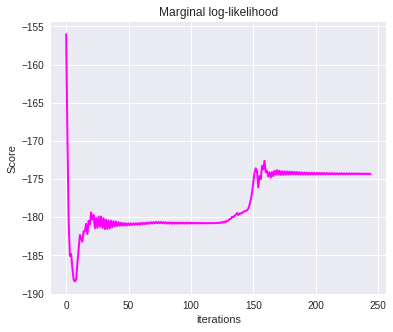

In [25]:
plt.figure(figsize=(6,5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_,color='magenta',linewidth=2)
plt.xlabel("iterations")
plt.ylabel("Score")

In [0]:
def f(x,noise_amount):
  y=np.sqrt(x)*np.sin(x)
  noise=np.random.normal(0,1,len(x))
  return y+noise_amount*noise

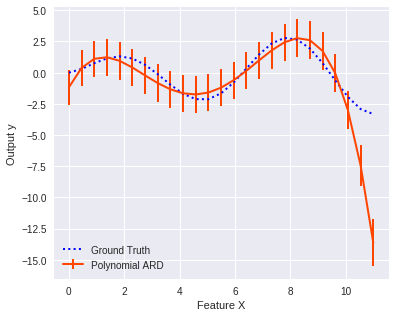

In [38]:
degree=10
X=np.linspace(0,10,100)
y=f(X,noise_amount=1)
clf_poly=ARDRegression(threshold_lambda=1e5)
clf_poly.fit(np.vander(X,degree),y)
X_plot=np.linspace(0,11,25)
y_plot=f(X_plot,noise_amount=0)
y_mean,y_std=clf_poly.predict(np.vander(X_plot,degree),return_std=True)
plt.figure(figsize=(6,5))
plt.errorbar(X_plot, y_mean, y_std, color='orangered',label="Polynomial ARD",linewidth=2)
plt.plot(X_plot,y_plot,color='blue',linewidth=2,label="Ground Truth",linestyle='dotted')
plt.xlabel("Feature X")
plt.ylabel("Output y")
plt.legend(loc=3)
plt.show()